# KMEANS algorithm

In [1]:
# pip install pyclustertend

In [2]:
# pip install numpy==<1.20>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from pyclustertend import hopkins

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('../data/all_preprocessed.csv')
df.head()

,author,content,poem name,age,type,age_type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore


In [5]:
tfidfVectorizer = TfidfVectorizer(stop_words='english')
vectorizedContent = tfidfVectorizer.fit_transform(df['content'])

In [6]:
finalData = pd.DataFrame(vectorizedContent.toarray(), columns=tfidfVectorizer.get_feature_names_out())
finalData.head()

,10,13,1538,19,1904,1914,1917,1919,1921,1922,...,yvory,ywis,zeal,zealous,zenophontes,zephyrs,zephyrus,zeus,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
colors = ['red', 'green', 'blue', 'purple', 'brown','pink', 'orange', 'darkblue', 'yellow', 'darkgreen']

In [8]:
def drawPlot(nClusters, labels, xs, ys, model):
    if labels == []:
        labels = ['cluster ' + str(i+1) for i in range(nClusters+1)]

    plt.figure(figsize=(8, 8))
    for i in range(nClusters):
        plt.scatter(reduced_data[model.labels_ == i, 0],
                    reduced_data[model.labels_ == i, 1], 
                    s=10, color=colors[i], 
                    label=f' {labels[i]}')
    plt.legend()
    plt.show()

## Hopkins statistic

In [9]:
hs = hopkins(finalData, finalData.shape[0])
hs

0.0857080350507027

## KMEANS - nonreduced data

#### Reduce the dimensionality of the data using PCA for plot creation

In [10]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[-1.22324382e-01, -1.32599829e-02],
       [-1.60406323e-04,  3.18143277e-03],
       [-1.97451592e-02,  1.01470648e-03],
       ...,
       [-4.74607385e-02,  8.67704108e-05],
       [-4.05900450e-02, -1.69912954e-03],
       [-1.52498297e-01, -2.53641754e-02]])

### K = 2

In [11]:
k = 2

#### Model creation

In [12]:
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=400, tol=0.00001)

In [13]:
model.fit(finalData)

KMeans(max_iter=400, n_clusters=2, n_init=20, tol=1e-05)

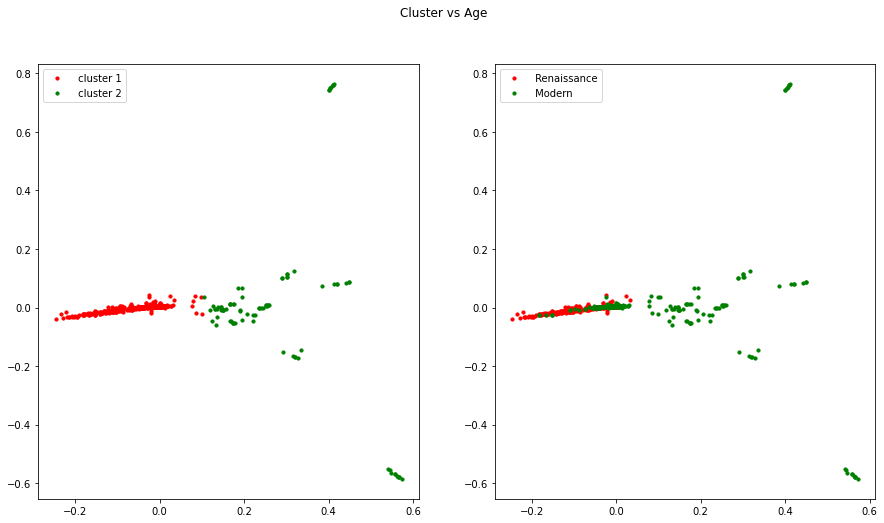

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Cluster vs Age')
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

for i in range(k):
    ax1.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
ax1.legend()

ages = df.age.unique()

i = 0
for a in ages:
    ids = df.index[df['age'] == a].tolist()
    ax2.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {ages[i]}')
    i+=1
ax2.legend()

## K = 3

In [15]:
k = 3

In [16]:
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=400, tol=0.00001)

In [17]:
model.fit(finalData)

KMeans(max_iter=400, n_clusters=3, n_init=20, tol=1e-05)

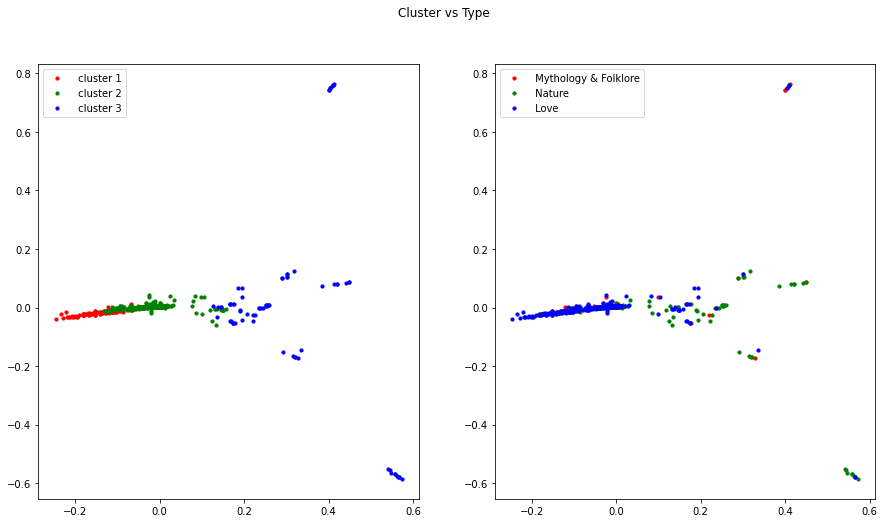

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Cluster vs Type')
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

for i in range(k):
    ax1.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
ax1.legend()

types = df.type.unique()

i = 0
for a in types:
    ids = df.index[df['type'] == a].tolist()
    ax2.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {types[i]}')
    i+=1
ax2.legend()

#### Elbow method on nonreduced data

In [19]:
ks = range(2, 10)
inertias = []
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
    kmeans.fit(finalData)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(finalData, kmeans.labels_))

<Figure size 720x360 with 0 Axes>

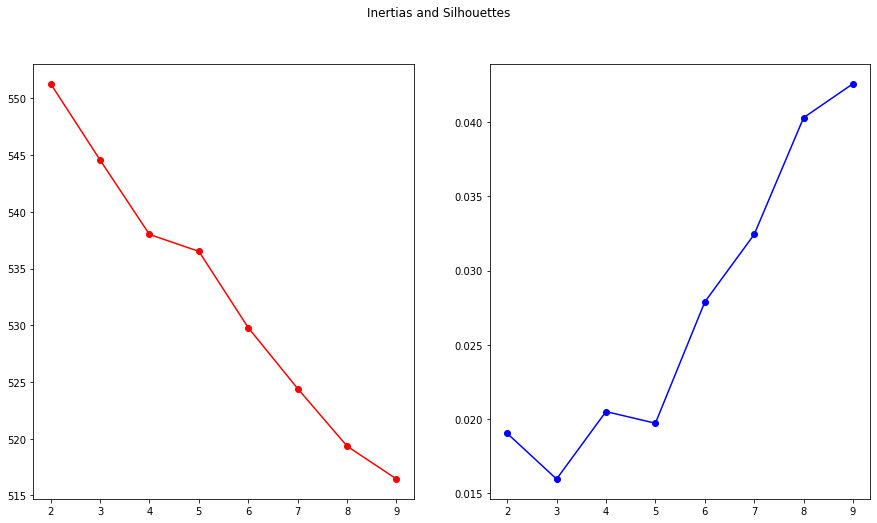

In [20]:
fig = plt.figure(figsize=(10, 5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Inertias and Silhouettes')

ax1.plot(ks, inertias, marker='o', color='red')
ax2.plot(ks, silhouettes, marker='o', color='blue')

## KMEANS - reduced data

In [21]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[-0.12233868, -0.01275084],
       [-0.00016197,  0.00312224],
       [-0.01974551,  0.00091987],
       ...,
       [-0.04747181,  0.00041124],
       [-0.04060348, -0.00162159],
       [-0.15249523, -0.02560605]])

In [22]:
ks = range(2, 10)
inertias = []
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(reduced_data, kmeans.labels_))

<Figure size 720x360 with 0 Axes>

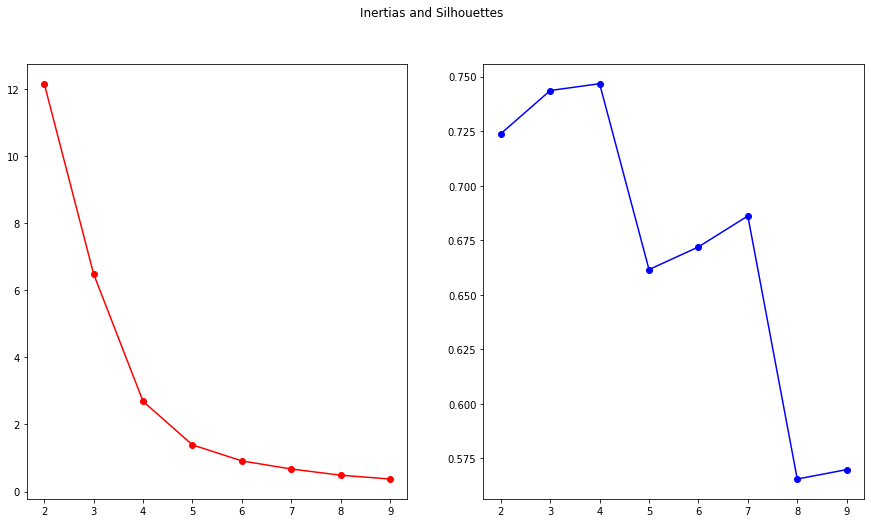

In [23]:
fig = plt.figure(figsize=(10, 5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Inertias and Silhouettes')

ax1.plot(ks, inertias, marker='o', color = 'red')
ax2.plot(ks, silhouettes, marker='o', color = 'blue')

In [24]:
k = 4  

In [25]:
model = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=400, tol=0.00001)

In [26]:
model.fit(reduced_data)

KMeans(max_iter=400, n_clusters=4, n_init=30, tol=1e-05)

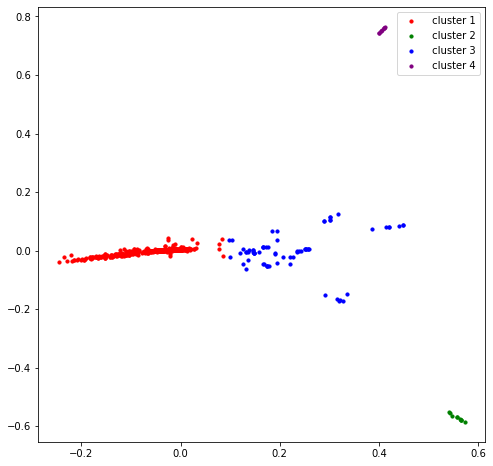

In [27]:
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
plt.legend()
plt.show()

Number of instances in each cluster:

In [28]:
np.bincount(model.labels_)

array([482,  10,  72,   9])

Age vs clusters:
(Clusers 2, 3 and 4 are treated as same cluster)

In [29]:
labels = []
for l in model.labels_:
    if(l == 0):
        labels.append(0)
    else:
        labels.append(1)
labels_ = np.array(labels)

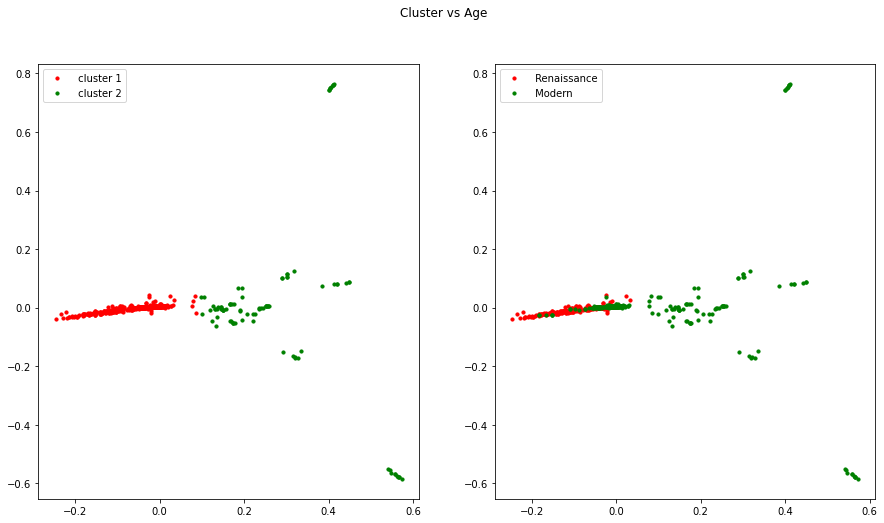

In [30]:
k = 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Cluster vs Age')
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

for i in range(k):
    ax1.scatter(reduced_data[labels_ == i, 0],
                reduced_data[labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
ax1.legend()

ages = df.age.unique()

i = 0
for a in ages:
    ids = df.index[df['age'] == a].tolist()
    ax2.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {ages[i]}')
    i+=1
ax2.legend()

In [31]:
labels = []
for l in labels_:
    if l == 0:
        labels.append('Renaissance')
    else:
        labels.append('Modern')
labels

['Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renaissance',
 'Renais

In [32]:
print(confusion_matrix(df['age'], labels))
print(classification_report(df['age'], labels, zero_division=True))

[[ 91 167]
 [  0 315]]
              precision    recall  f1-score   support

      Modern       1.00      0.35      0.52       258
 Renaissance       0.65      1.00      0.79       315

    accuracy                           0.71       573
   macro avg       0.83      0.68      0.66       573
weighted avg       0.81      0.71      0.67       573

